# Working sheet
## 08 - Poisson regression
V08.01.00 - 2024-02-26

## Load data
Change the path and the filename in the following box.

In [25]:
library(readr)
df <- read_csv("data/affairs_subset.csv",
                 show_col_types = FALSE)


Look at the structure and the head of the dataset.

In [26]:
str(df)

spc_tbl_ [20 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ affairs      : num [1:20] 12 0 0 0 12 12 0 12 2 0 ...
 $ gender       : chr [1:20] "female" "female" "male" "female" ...
 $ age          : num [1:20] 42 32 32 32 37 42 27 17.5 37 27 ...
 $ yearsmarried : num [1:20] 15 15 10 15 15 15 0.417 0.75 15 1.5 ...
 $ children     : chr [1:20] "yes" "yes" "yes" "yes" ...
 $ religiousness: num [1:20] 5 2 3 4 5 4 4 2 4 2 ...
 $ education    : num [1:20] 9 14 20 18 17 12 20 12 18 16 ...
 $ rating       : num [1:20] 1 4 5 4 2 1 4 3 1 5 ...
 - attr(*, "spec")=
  .. cols(
  ..   affairs = col_double(),
  ..   gender = col_character(),
  ..   age = col_double(),
  ..   yearsmarried = col_double(),
  ..   children = col_character(),
  ..   religiousness = col_double(),
  ..   education = col_double(),
  ..   rating = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [27]:
head(df)

affairs,gender,age,yearsmarried,children,religiousness,education,rating
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
12,female,42,15,yes,5,9,1
0,female,32,15,yes,2,14,4
0,male,32,10,yes,3,20,5
0,female,32,15,yes,4,18,4
12,male,37,15,yes,5,17,2
12,female,42,15,yes,4,12,1


In [28]:
summary(df)

    affairs         gender               age         yearsmarried   
 Min.   : 0.00   Length:20          Min.   :17.50   Min.   : 0.417  
 1st Qu.: 0.00   Class :character   1st Qu.:27.00   1st Qu.: 4.000  
 Median : 0.00   Mode  :character   Median :32.00   Median :10.000  
 Mean   : 3.60                      Mean   :32.52   Mean   : 9.521  
 3rd Qu.: 8.25                      3rd Qu.:37.00   3rd Qu.:15.000  
 Max.   :12.00                      Max.   :47.00   Max.   :15.000  
   children         religiousness    education        rating    
 Length:20          Min.   :1.00   Min.   : 9.0   Min.   :1.00  
 Class :character   1st Qu.:2.00   1st Qu.:14.0   1st Qu.:2.00  
 Mode  :character   Median :4.00   Median :16.5   Median :4.00  
                    Mean   :3.35   Mean   :15.8   Mean   :3.30  
                    3rd Qu.:4.25   3rd Qu.:18.0   3rd Qu.:4.25  
                    Max.   :5.00   Max.   :20.0   Max.   :5.00  

In [29]:
library(Hmisc)
describe(df)

df 

 8  Variables      20  Observations
--------------------------------------------------------------------------------
affairs 
       n  missing distinct     Info     Mean      Gmd 
      20        0        5     0.77      3.6    5.232 
                                   
Value         0    2    3    7   12
Frequency    12    1    1    1    5
Proportion 0.60 0.05 0.05 0.05 0.25

For the frequency table, variable is rounded to the nearest 0
--------------------------------------------------------------------------------
gender 
       n  missing distinct 
      20        0        2 
                        
Value      female   male
Frequency      11      9
Proportion   0.55   0.45
--------------------------------------------------------------------------------
age 
       n  missing distinct     Info     Mean      Gmd 
      20        0        7    0.961    32.52    9.213 
                                             
Value      17.5 22.0 27.0 32.0 37.0 42.0 47.0
Frequency     1    

Plot the variables of interest with a scatter plot matrix from package GGally.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


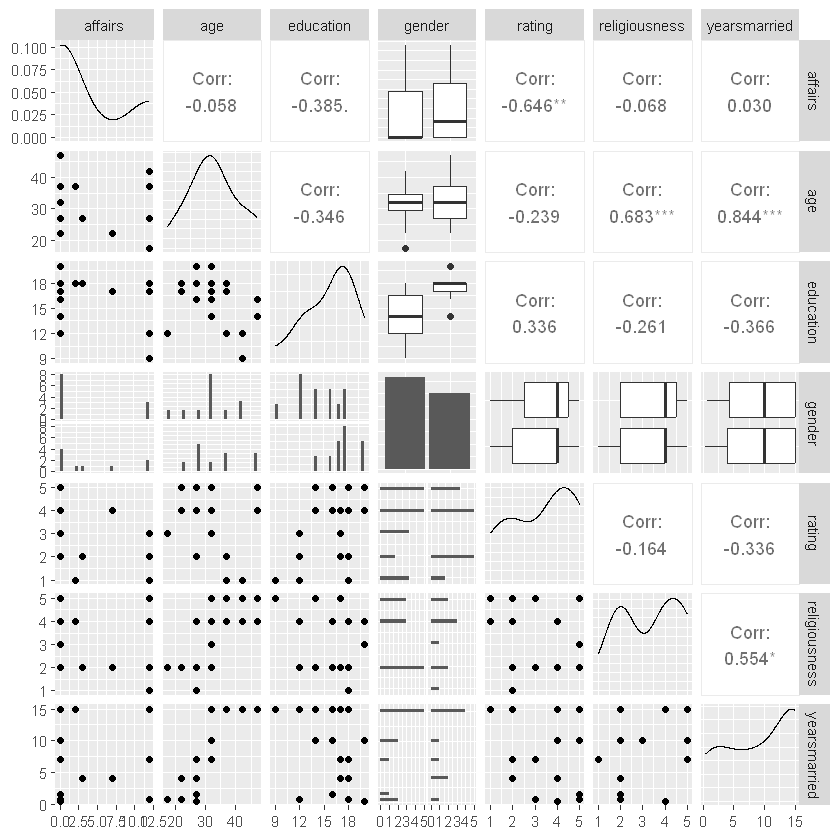

In [30]:
library(GGally)
library(tidyverse)
df1 <- df %>% dplyr::select(affairs, age, education, gender, rating, religiousness, yearsmarried)
ggpairs(df1)


## Assumptions of Poisson regression

- Dependent variable contains count data
- One or more independent variables on a continous, ordinal or nominal scale.
- Independence of individual observations
- Distribution of counts follows a Poisson distribution
- Equidispersion, mean and variance of the model are identical


TODO: Check completeness of the assumptions and add example code for the checks.

## Coding of categorical variables

- gender
- children

If using character variables, the first level of the alphabetic sort order will be regardes as reference level.

For some functions the character variable has to be converted to a factor, e.g., for the contrasts() function.


In [31]:
table(df$gender)
table(df$children)


female   male 
    11      9 


 no yes 
  2  18 

In [32]:
contrasts(as.factor(df$gender))
contrasts(as.factor(df$children))

,male
female,0
male,1


,yes
no,0
yes,1


Dummy coding is the default coding.

## Fit the model


In [33]:
library(MASS)
library(broom)
my_glm <- glm(affairs ~ age + education + gender + rating + religiousness + yearsmarried,
                     family = 'poisson', data = affairs_subset)


## Summary of the model

In [34]:
summary(my_glm)


Call:
glm(formula = affairs ~ age + education + gender + rating + religiousness + 
    yearsmarried, family = "poisson", data = affairs_subset)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   14.13138    2.28381   6.188 6.11e-10 ***
age           -0.17494    0.05743  -3.046  0.00232 ** 
education     -0.51178    0.12333  -4.150 3.33e-05 ***
gendermale     2.97300    0.80466   3.695  0.00022 ***
rating        -0.81165    0.17507  -4.636 3.55e-06 ***
religiousness -0.07533    0.17922  -0.420  0.67425    
yearsmarried   0.11765    0.08209   1.433  0.15179    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 150.341  on 19  degrees of freedom
Residual deviance:  41.231  on 13  degrees of freedom
AIC: 86.327

Number of Fisher Scoring iterations: 6


## Estimates

In [35]:
tidy(my_glm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),14.13137756,2.28380578,6.1876442,6.106998e-10
age,-0.17493751,0.05743164,-3.0460131,2.318977e-03
education,-0.51178177,0.12333162,-4.1496398,3.329989e-05
gendermale,2.97300483,0.80465782,3.6947442,2.201083e-04
rating,-0.81165480,0.17507142,-4.6361354,3.549835e-06
religiousness,-0.07532957,0.17921813,-0.4203234,6.742493e-01
yearsmarried,0.11764964,0.08208607,1.4332473,1.517872e-01


## Model

In [36]:
glance(my_glm)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
150.3413,19,-36.16375,86.3275,93.29762,41.23102,13,20


## Residuals


In [37]:
augment(my_glm) %>% head()

affairs,age,education,gender,rating,religiousness,yearsmarried,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,42,9,female,1,5,15,2.7544080,-0.9774667,0.89313444,1.640387,9.7965566967,-2.9900821
0,32,14,female,4,2,15,-0.2641014,-1.2392705,0.35754882,1.799085,0.0950296746,-1.5461301
0,32,20,male,5,3,10,-1.8370198,-0.5644315,0.06041688,1.845986,0.0015573357,-0.5822957
0,32,18,female,4,4,15,-2.4618877,-0.4129742,0.06684414,1.849510,0.0009351316,-0.4275095
12,37,17,male,2,5,15,1.6961914,2.4156663,0.52456403,1.553414,2.6057698931,3.5034097
12,42,12,female,1,4,15,1.2943922,3.4452723,0.39044262,1.346540,2.8693442345,4.4128204


Only the first rows are displayed.